<a href="https://colab.research.google.com/github/Mohan31100/Time-series-forecasting/blob/main/time_series_forecasting_fair.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
from random import random
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error, mean_squared_log_error

In [ ]:
df = pd.read_csv('/content/NKE.csv', header=0, parse_dates=[0])
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-02-12,0.179688,0.183594,0.179688,0.179688,0.130707,100710400
1,1980-03-12,0.177734,0.177734,0.175781,0.175781,0.127865,25177600
2,1980-04-12,0.181641,0.183594,0.181641,0.181641,0.132128,22694400
3,1980-05-12,0.175781,0.175781,0.171875,0.171875,0.125024,7590400
4,1980-08-12,0.164063,0.164063,0.162109,0.162109,0.117920,5414400
5,1980-09-12,0.162109,0.162109,0.158203,0.158203,0.115079,5824000
6,1980-10-12,0.154297,0.154297,0.148438,0.148438,0.107975,5875200
7,1980-11-12,0.144531,0.144531,0.140625,0.140625,0.102292,5440000
8,1980-12-12,0.146484,0.148438,0.146484,0.146484,0.106554,8153600
9,1980-12-15,0.152344,0.154297,0.152344,0.152344,0.110817,6643200


In [ ]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [ ]:
df.shape

(10578, 7)

In [ ]:
df.describe

<bound method NDFrame.describe of             Date        Open        High         Low       Close   Adj Close  \
0     1980-02-12    0.179688    0.183594    0.179688    0.179688    0.130707   
1     1980-03-12    0.177734    0.177734    0.175781    0.175781    0.127865   
2     1980-04-12    0.181641    0.183594    0.181641    0.181641    0.132128   
3     1980-05-12    0.175781    0.175781    0.171875    0.171875    0.125024   
4     1980-08-12    0.164063    0.164063    0.162109    0.162109    0.117920   
...          ...         ...         ...         ...         ...         ...   
10573 2022-07-11   96.309998   96.870003   92.669998   93.440002   93.440002   
10574 2022-08-11   94.440002   96.029999   92.940002   93.750000   93.750000   
10575 2022-09-11   92.669998   93.900002   91.959999   92.099998   92.099998   
10576 2022-10-11   96.330002   99.680000   96.230003   99.489998   99.489998   
10577 2022-11-11  100.309998  107.209999  100.139999  106.089996  106.089996   

     

In [ ]:
print('Time period start: {}\nTime period end: {}'.format(df.Date.min(),df.Date.max()))

Time period start: 1980-02-12 00:00:00
Time period end: 2022-12-10 00:00:00


In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%y')
y=df.set_index('Date')
x=df['Adj Close']

In [ ]:
y.index

DatetimeIndex(['1980-02-12', '1980-03-12', '1980-04-12', '1980-05-12',
               '1980-08-12', '1980-09-12', '1980-10-12', '1980-11-12',
               '1980-12-12', '1980-12-15',
               ...
               '2022-10-31', '2022-01-11', '2022-02-11', '2022-03-11',
               '2022-04-11', '2022-07-11', '2022-08-11', '2022-09-11',
               '2022-10-11', '2022-11-11'],
              dtype='datetime64[ns]', name='Date', length=10578, freq=None)

In [ ]:
y.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

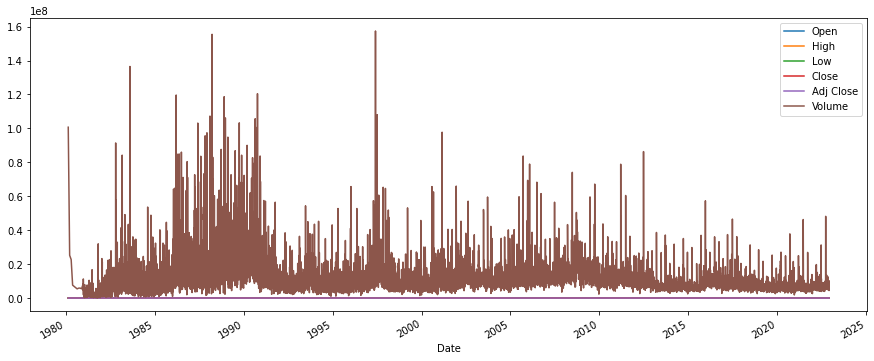

In [ ]:
y.plot(figsize=(15,6))
plt.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f4dc50c4af0>,
      dtype=object)

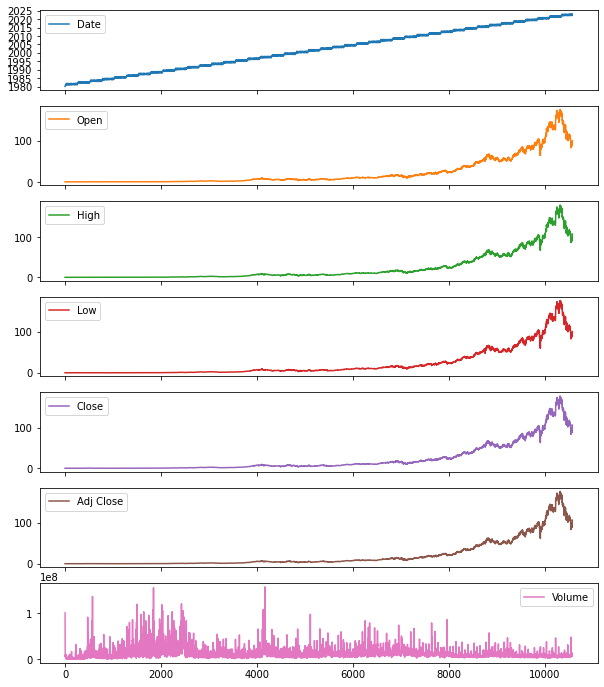

In [ ]:
df.plot(subplots=True, figsize=(10, 12))

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


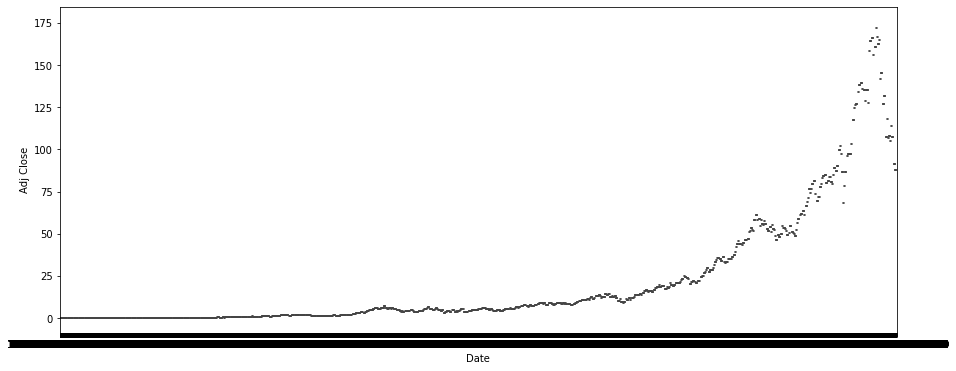

In [ ]:
fig, ax = plt.subplots(figsize=(15,6))
sns.boxplot(y.index,x , ax=ax)

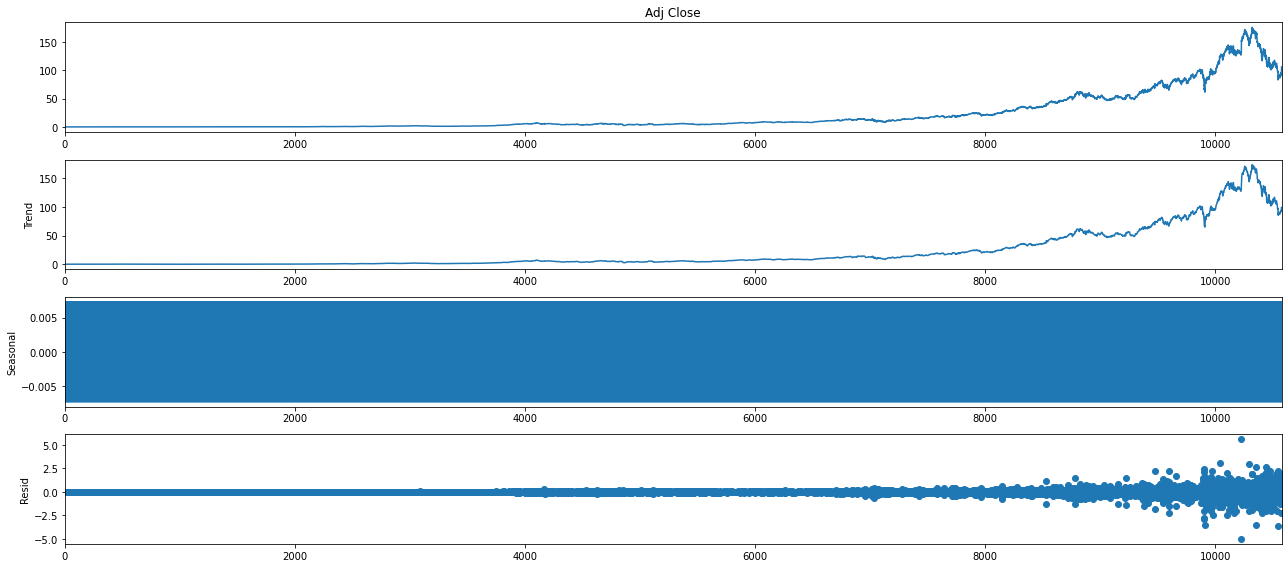

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(x, model='addictive',period=2)
fig = decomposition.plot()
plt.show()

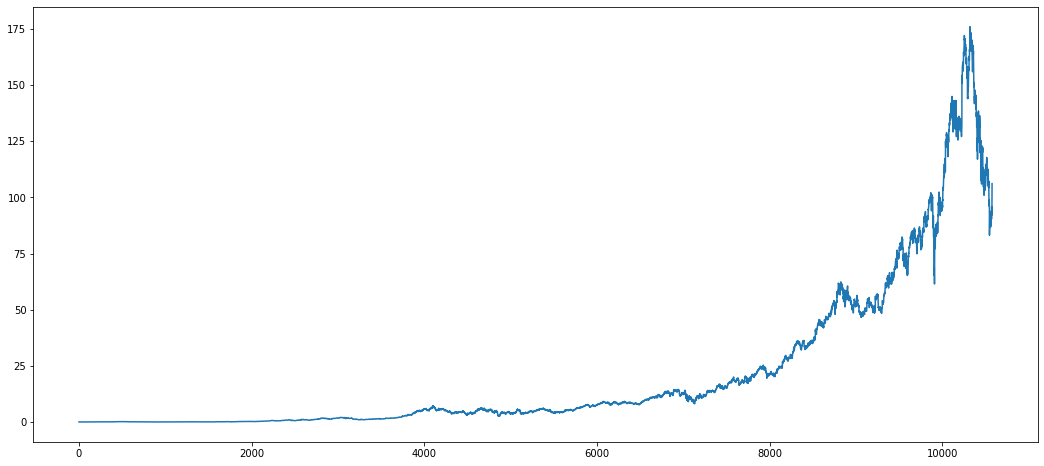

In [ ]:
plt.plot(x)

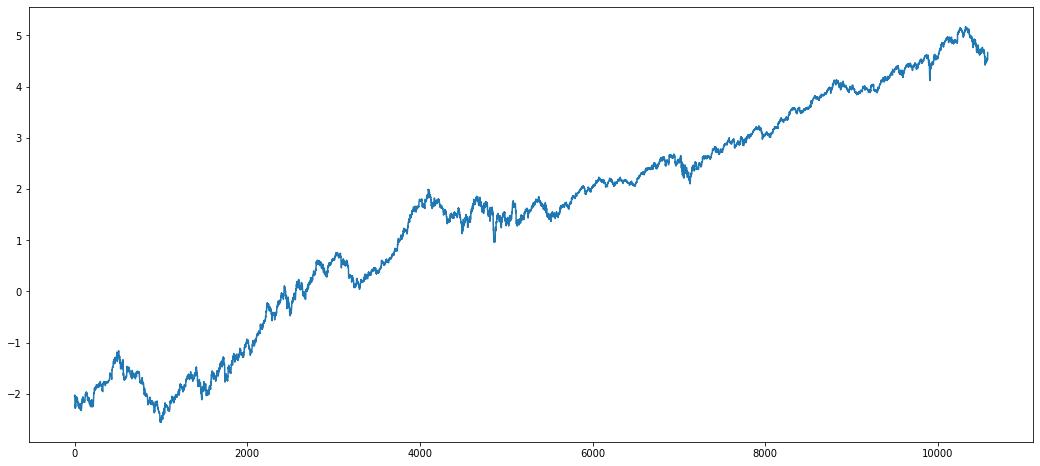

In [ ]:
ts_log = np.log(x)
plt.plot(ts_log)


Text(0.5, 1.0, 'Rolling Mean & Standard Deviation')

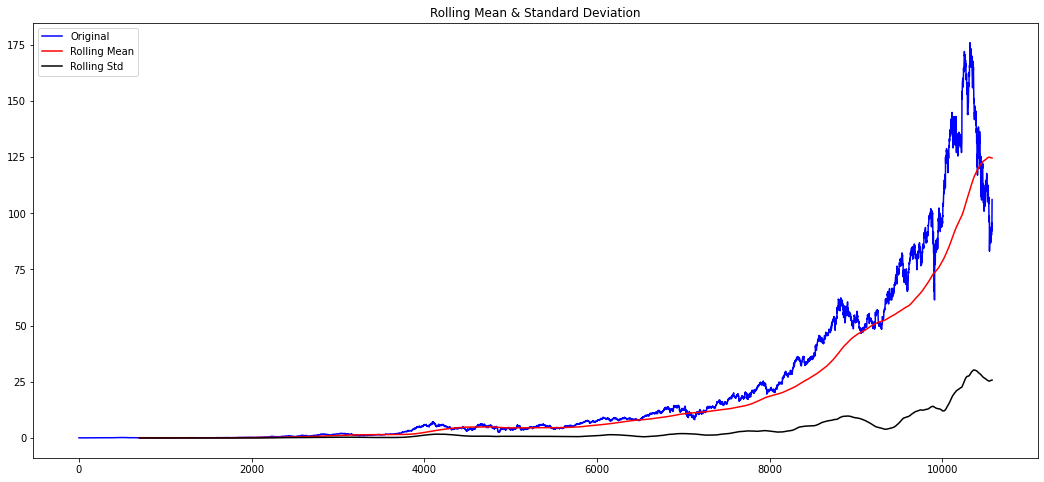

In [ ]:
df['Adj Close rollingm']=x.rolling(700).mean()
df['Adj Close rollings']=df['Adj Close'].rolling(700).std()
orig = plt.plot(x, color='blue',label='Original')
mean = plt.plot(df['Adj Close rollingm'], color='red', label='Rolling Mean')
std = plt.plot(df['Adj Close rollings'], color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')

In [ ]:
from statsmodels.tsa.stattools import adfuller
print ('Results of Dickey-Fuller Test:')
dftest = adfuller(df['Adj Close'], autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print (dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                     0.169847
p-value                            0.970519
#Lags Used                        39.000000
Number of Observations Used    10538.000000
Critical Value (1%)               -3.430971
Critical Value (5%)               -2.861814
Critical Value (10%)              -2.566916
dtype: float64


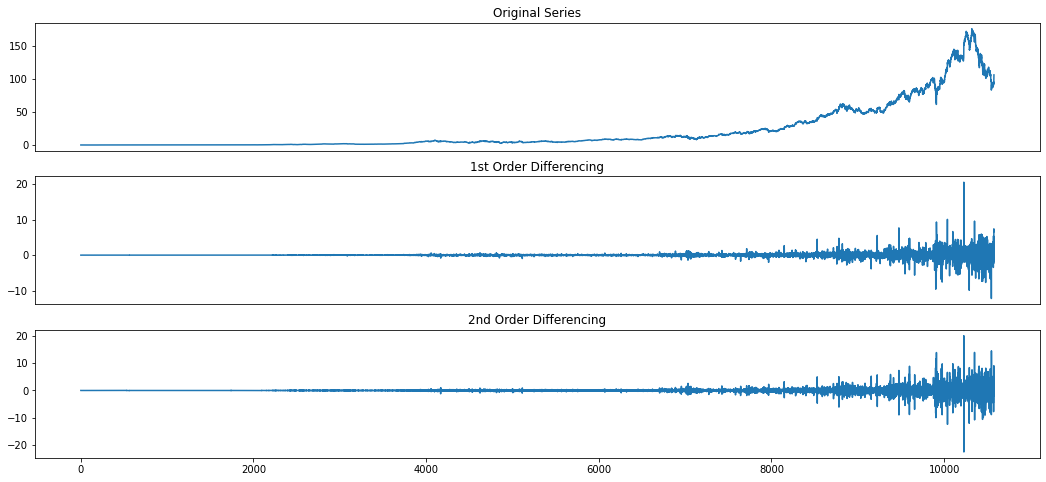

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(3)
ax1.plot(x); ax1.set_title('Original Series'); ax1.axes.xaxis.set_visible(False)
ax2.plot(x.diff()); ax2.set_title('1st Order Differencing'); ax2.axes.xaxis.set_visible(False)
ax3.plot(x.diff().diff()); ax3.set_title('2nd Order Differencing')
plt.show()

In [ ]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(100)

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
        ...   
95    0.051629
96    0.040969
97    0.040366
98    0.028588
99   -0.026240
Name: Adj Close, Length: 100, dtype: float64

In [ ]:
ts_log_moving_avg_diff.dropna(inplace=True)
ts_log_moving_avg_diff.head(250)

9     -0.055930
10    -0.062804
11    -0.082142
12    -0.033605
13     0.017685
         ...   
254    0.022500
255    0.016521
256    0.011016
257   -0.002558
258   -0.013444
Name: Adj Close, Length: 250, dtype: float64

Results of Dickey-Fuller Test:
Test Statistic                   -25.223625
p-value                            0.000000
#Lags Used                        10.000000
Number of Observations Used    10558.000000
Critical Value (1%)               -3.430970
Critical Value (5%)               -2.861814
Critical Value (10%)              -2.566916
dtype: float64


Text(0.5, 1.0, 'Rolling Mean & Standard Deviation')

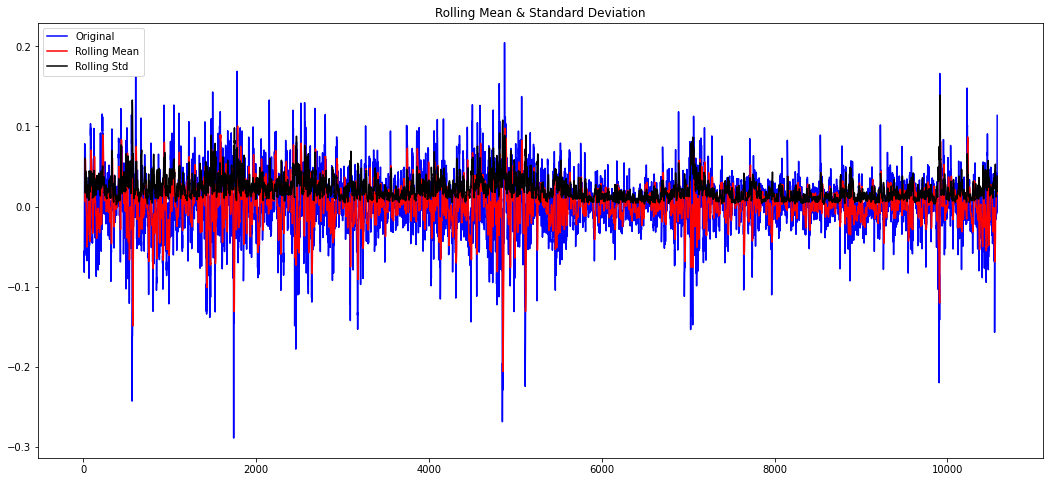

In [ ]:
print ('Results of Dickey-Fuller Test:')
dftest = adfuller(ts_log_moving_avg_diff, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print (dfoutput)

ts_log_moving_avg_diff_rm=ts_log_moving_avg_diff.rolling(10).mean()
ts_log_moving_avg_diff_rs=ts_log_moving_avg_diff.rolling(10).std()
orig = plt.plot(ts_log_moving_avg_diff, color='blue',label='Original')
mean = plt.plot(ts_log_moving_avg_diff_rm, color='red', label='Rolling Mean')
std = plt.plot(ts_log_moving_avg_diff_rs, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')

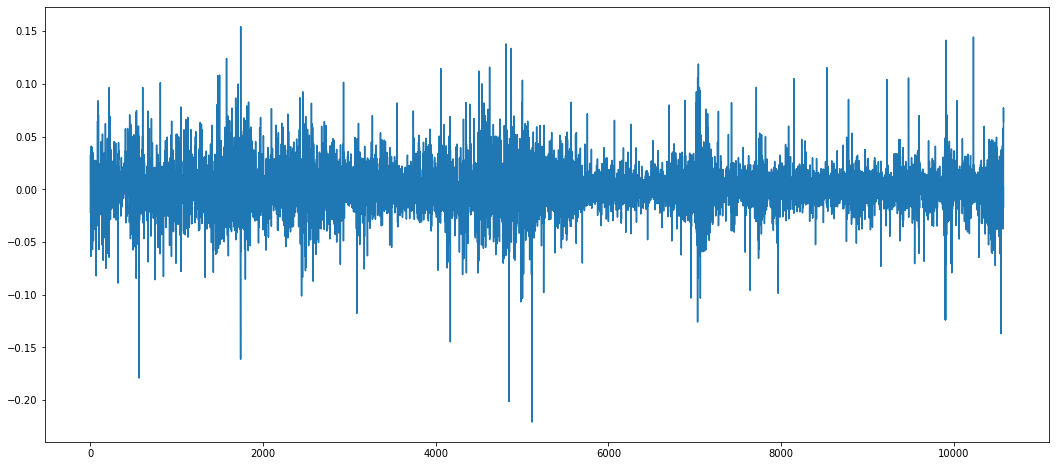

In [ ]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

Results of Dickey-Fuller Test:
Test Statistic                   -32.725058
p-value                            0.000000
#Lags Used                         9.000000
Number of Observations Used    10567.000000
Critical Value (1%)               -3.430969
Critical Value (5%)               -2.861814
Critical Value (10%)              -2.566916
dtype: float64


Text(0.5, 1.0, 'Rolling Mean & Standard Deviation')

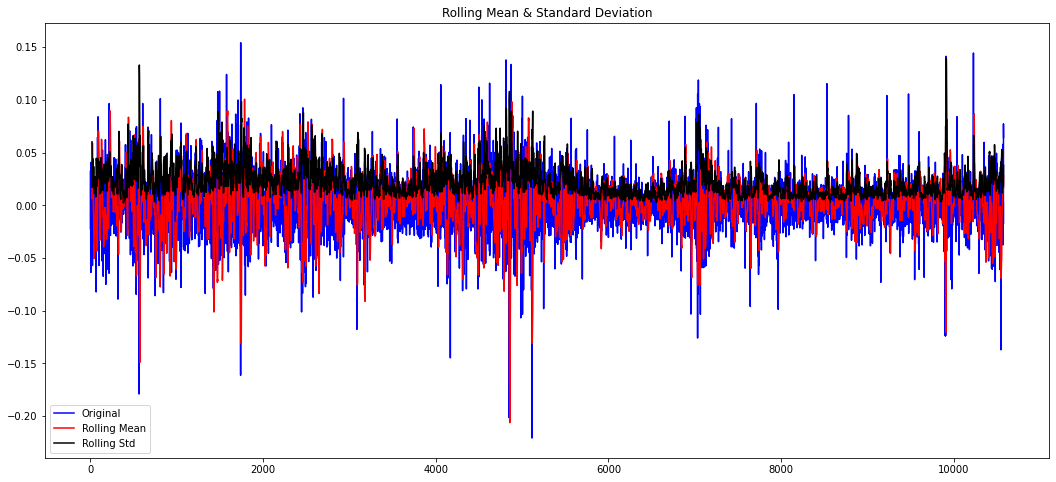

In [ ]:
ts_log_diff.dropna(inplace=True)
print ('Results of Dickey-Fuller Test:')
dftest = adfuller(ts_log_diff, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print (dfoutput)

ts_log_diff_rm=ts_log_moving_avg_diff.rolling(10).mean()
ts_log_diff_rs=ts_log_moving_avg_diff.rolling(10).std()
orig = plt.plot(ts_log_diff, color='blue',label='Original')
mean = plt.plot(ts_log_diff_rm, color='red', label='Rolling Mean')
std = plt.plot(ts_log_diff_rs, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')

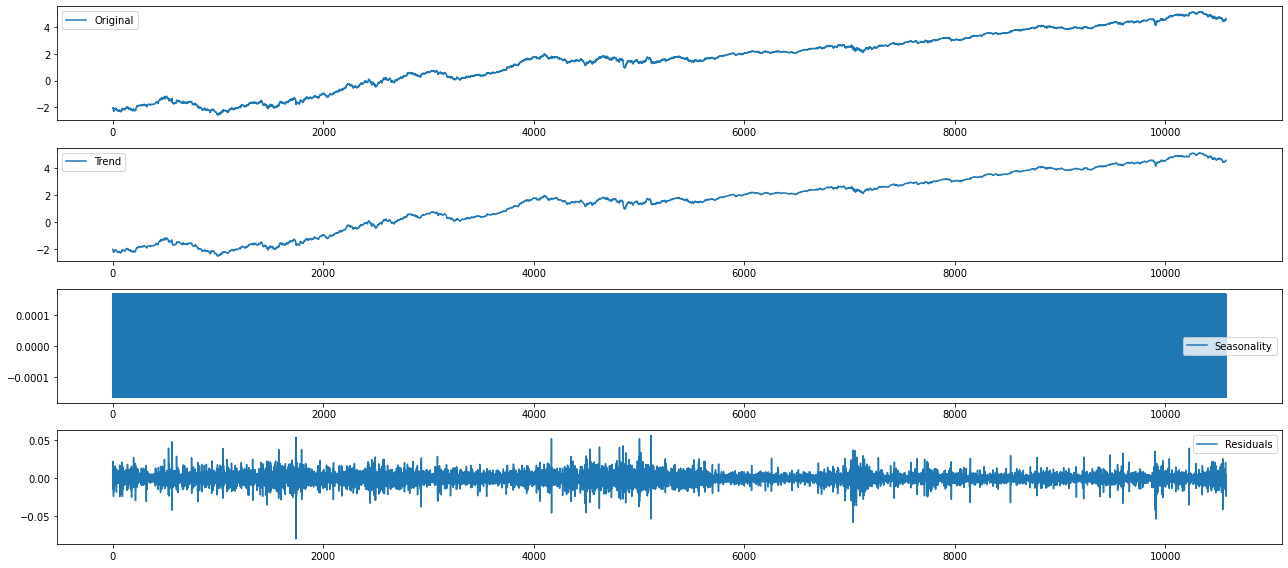

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log , period=2)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

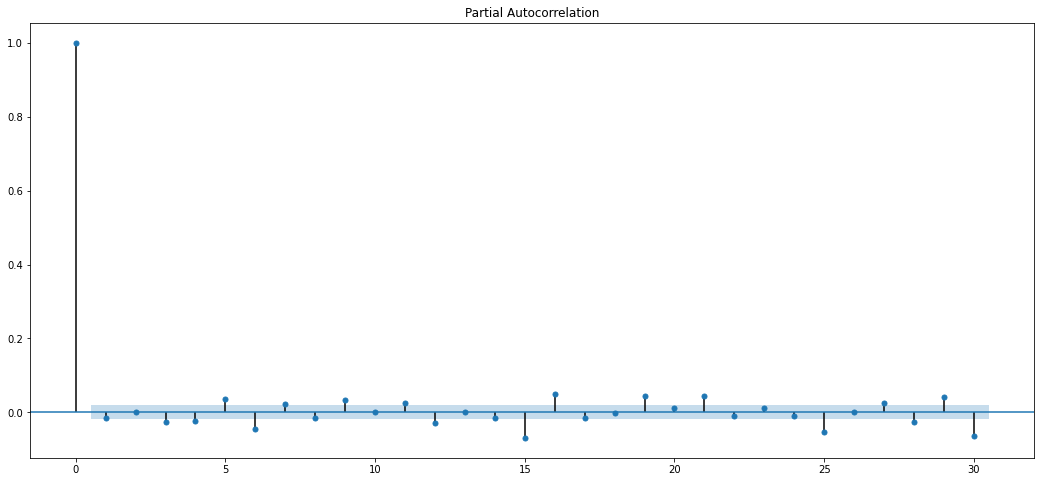

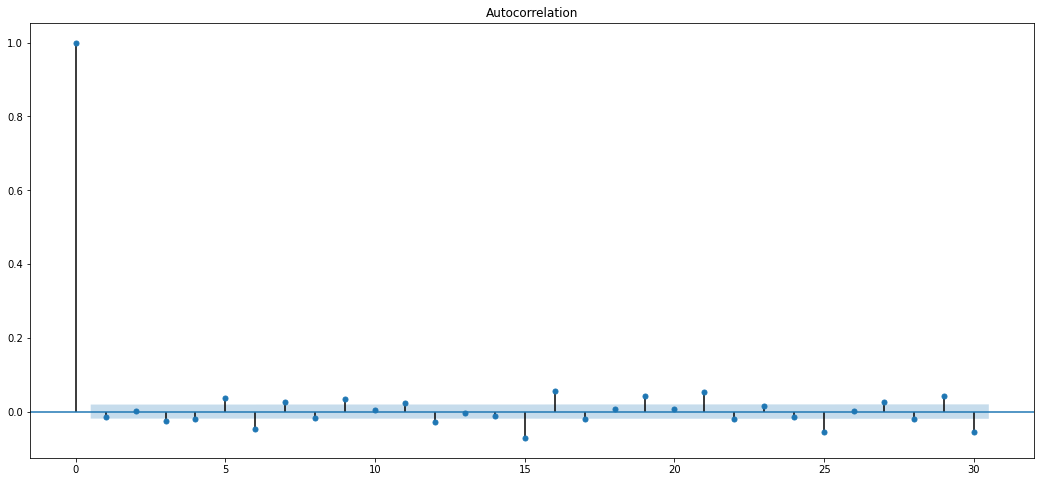

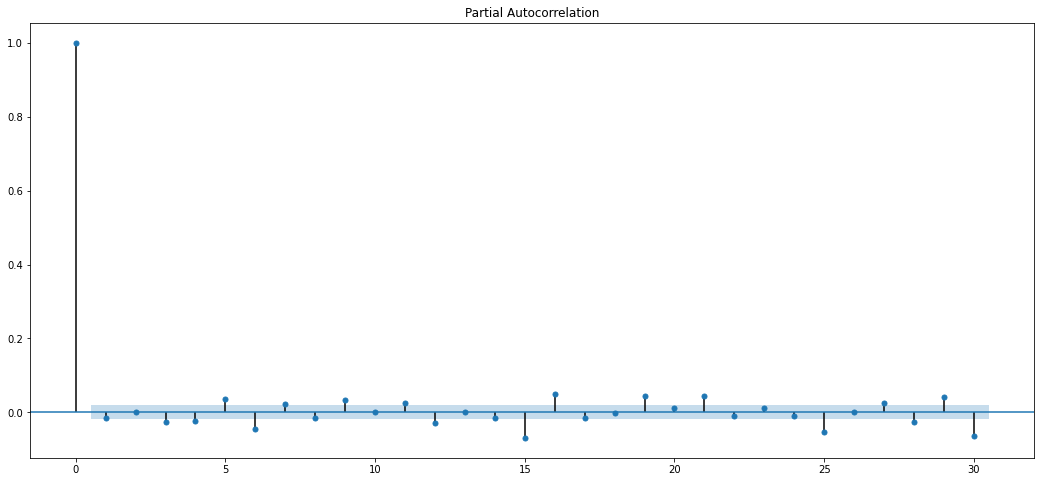

In [ ]:
ts = x - x.shift()
ts.dropna(inplace=True)

from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(ts, lags=30)
plot_pacf(ts, lags=30)


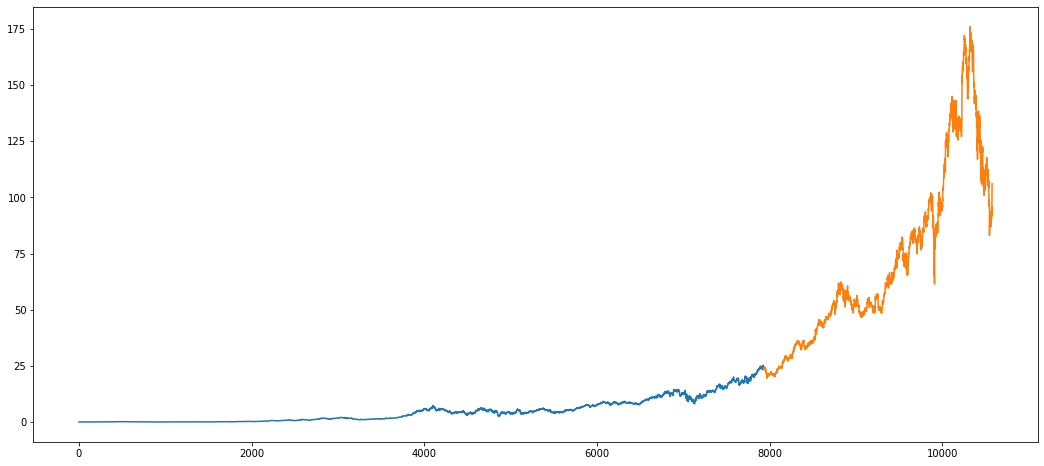

In [ ]:
train = x[:int(0.75*(len(y)))]
valid = x[int(0.75*(len(y))):]
train.plot()
valid.plot()

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(x , order= (1,1,1))
model_fit= model.fit()
model_fit.summary()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:            D.Adj Close   No. Observations:                10577
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -12268.732
Method:                       css-mle   S.D. of innovations              0.772
Date:                Thu, 01 Dec 2022   AIC                          24545.463
Time:                        03:54:58   BIC                          24574.529
Sample:                             1   HQIC                         24555.275
                                                                              
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0100      0.007      1.350      0.177      -0.005       0.025
ar.L1.D.Adj Close    -0.3057      0.287     -1.066      0.286      -0.868       0.256
ma.L1.D.Adj Close     0.2905      0.288      1.009      0.313      -0.274       0.855
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -3.2713           +0.0000j            3.2713            0.5000
MA.1           -3.4423           +0.0000j            3.4423            0.5000
-----------------------------------------------------------------------------
"""

In [ ]:
start_index = valid.index.min()
end_index = valid.index.max()
predictions = model_fit.predict(start=start_index, end=end_index)

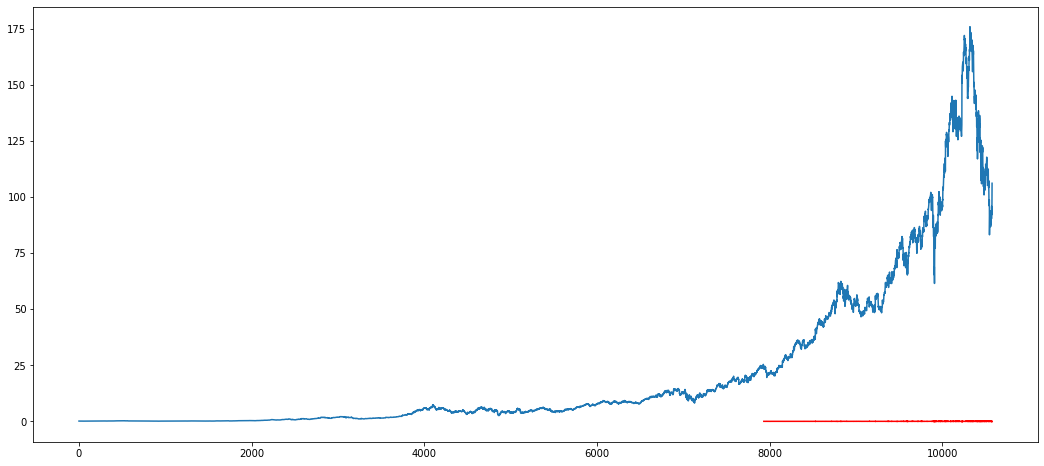

In [ ]:
plt.plot(x)
plt.plot(predictions, color='red')

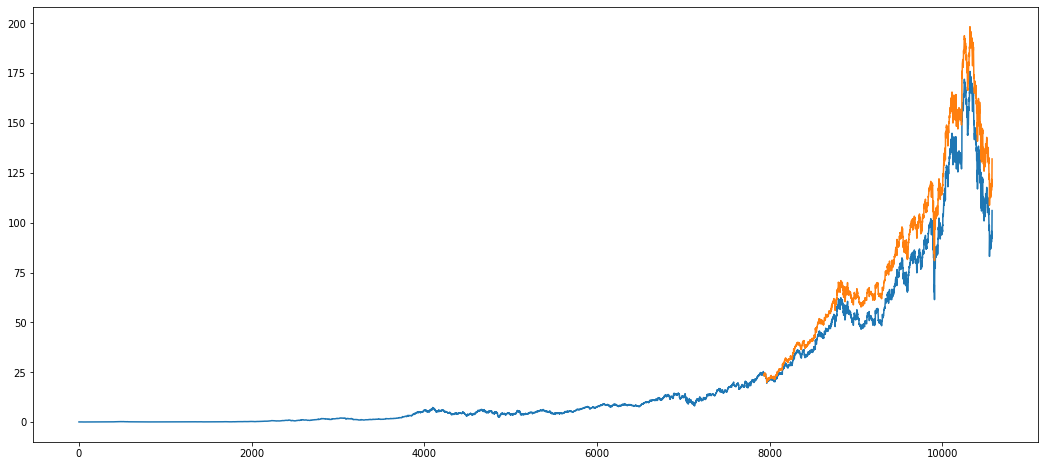

In [ ]:
plt.plot(x)
plt.plot(predictions_ARIMA_log)

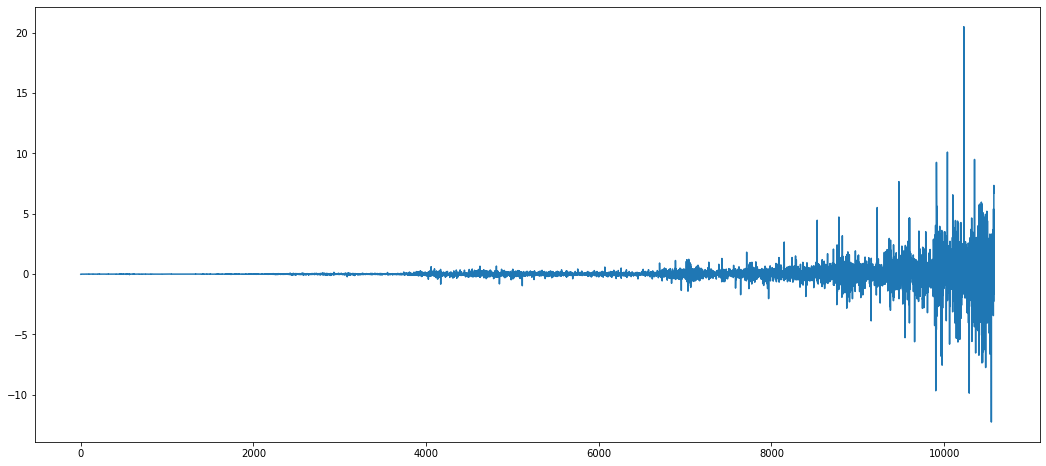

In [ ]:
residuals = model_fit.resid
residuals.plot()

In [ ]:
output = model_fit.forecast()
output

(array([106.03515427]),
 array([0.77182752]),
 array([[104.52240012, 107.54790841]]))

In [ ]:
model_fit.forecast(5)

(array([106.03515427, 106.06499279, 106.06894567, 106.08081145,
        106.09025836]),
 array([0.77182752, 1.08327408, 1.32540805, 1.52913665, 1.70889494]),
 array([[104.52240012, 107.54790841],
        [103.94181461, 108.18817098],
        [103.47119362, 108.66669771],
        [103.0837587 , 109.0778642 ],
        [102.74088581, 109.4396309 ]]))

In [ ]:
predictions_ARIMA_diff = pd.Series(predictions, copy=True)
print (predictions_ARIMA_diff.head())

7933    0.012341
7934    0.007130
7935    0.013665
7936    0.009947
7937    0.010926
dtype: float64


In [ ]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print (predictions_ARIMA_diff_cumsum.head())

7933    0.012341
7934    0.019471
7935    0.033136
7936    0.043082
7937    0.054008
dtype: float64


In [ ]:
predictions_ARIMA_log = pd.Series(valid, index=valid.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

7933    24.037859
7934    23.869674
7935    23.827861
7936    23.788981
7937    23.209589
dtype: float64